In [3]:
import pandas as pd
import seaborn as sns
import os

In [4]:
os.listdir('data')

['sider.csv.gz',
 'deepchem_Lipophilicity.csv',
 'clintox.csv.gz.dvc',
 'HIV.csv.dvc',
 'deepchem_PPB.csv',
 'HIV.csv',
 'Solubility_delaney-processed.csv',
 'BBBP.csv.dvc',
 'muv.csv.gz.dvc',
 'Solubility_delaney-processed.csv.dvc',
 '.gitignore',
 'sider.csv.gz.dvc',
 'Free_Solv_SAMPL.csv.dvc',
 'bace.csv.dvc',
 'tox21.csv.gz',
 'BBBP.csv',
 '.ipynb_checkpoints',
 'deepchem_PPB_details.txt',
 'clintox.csv.gz',
 'bace.csv',
 'deepchem_Lipophilicity.csv.dvc',
 'deepchem_Lipophilicity_details.txt',
 'Free_Solv_SAMPL.csv',
 'muv.csv.gz',
 'deepchem_PPB.csv.dvc']

In [5]:
datasets=['bace.csv','BBBP.csv','PPB.csv']

In [7]:
df=pd.read_csv('data/HIV.csv')

In [8]:
df.head(5)

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [10]:
df.value_counts('HIV_active')

HIV_active
0    39684
1     1443
dtype: int64

In [13]:
df.isna().sum()

smiles        0
activity      0
HIV_active    0
dtype: int64

<AxesSubplot:xlabel='HIV_active', ylabel='Count'>

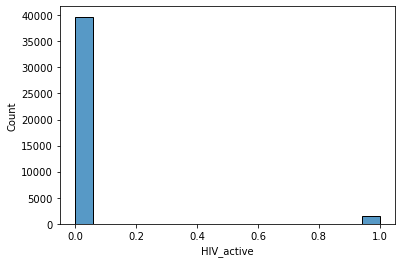

In [11]:
sns.histplot(df,x='HIV_active')

In [12]:
#To do- build dictionary of dataset:target column
#Convert data sets with regression problems into classification ones
# EDA: class balance, clustering? to assess chemical variability?
# check for missing values


In [14]:
# add simple features? (LogP, MW/#heavy atoms,others? - look for correlation?